# **Loading libraries**



In [1]:
%pip install gdown
%pip install tqdm scikit-learn
%pip install geopandas
%pip install geohash2

import pandas as pd
import plotly.express as px
import gdown
import os
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
from google.colab import drive
from math import radians, sin, cos, sqrt, atan2
import geopandas as gpd
from shapely.geometry import Point
from sklearn.neighbors import BallTree
from tqdm import tqdm
import geohash2
from sklearn.cluster import KMeans



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 9.5 MB/s eta 0:00:00
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15622 sha256=1e2ed322e0674a5c0c09a452560dee7af235c3970be63fa5c1e1ee51ee5613e1
  Stored in directory: /root/.cache/pip/wheels/f6/7c/c4/1b3c6fea0ebc53bf730dc86bbee7a713d501455dfb4c1f0623
Successfully built geohash2


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


# **Loading the data**

downloading the dataset

In [ ]:
folder_id = '1O3w5OKnS__hzlL8kTSfGCUc_iX8XNjEN'
# Define the directory where you want to save the downloaded content
output_dir = 'Homework'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Attempting to download content from folder ID: {folder_id} into {output_dir}")

try:
    # Use gdown to download the entire folder
    # The 'folder=True' argument is crucial for downloading folders
    # 'quiet=False' will show progress
    gdown.download_folder(id=folder_id, output=output_dir, quiet=False, use_cookies=False)
    print(f"\nSuccessfully downloaded content to: /content/{output_dir}")
    print("You can now find the downloaded content in the 'downloaded_external_folder' directory in your Colab files browser.")

except Exception as e:
    print(f"\nAn error occurred during download: {e}")
    print("Please ensure the Google Drive folder is publicly accessible or shared with 'Anyone with the link can view'.")

Attempting to download content from folder ID: 1O3w5OKnS__hzlL8kTSfGCUc_iX8XNjEN into Homework


Retrieving folder contents


Retrieving folder 149d_ehaSllHOybgtRpe1zGwzP1zICTsF data
Processing file 18BuV5NS_p_5KpYwpFDYJ0fhJTt3_NGwD Capital_Bikeshare_Locations.csv
Processing file 1XWaDjw_dTA-miKuQ5pnr0UIaR451QXkX daily-rent-sampled.parquet
Processing file 1O5P_mHB1Rndpr8wOKz-PQlb0HsOTNs3z daily-rent.parquet
Processing file 1qyVc4Guwn2Hemu9eMVNvgrTC08Fj6dHF DDOT_Central_Business_District.geojson
Processing file 1AiUrXtpCaLDjLgWg65CVS42IeZfzJEHO Metro_Bus_Stops.csv
Processing file 10wgapvyZQEwPdQj2Te9B7Xc1_5tkFrBh Residential_and_Visitor_Parking_Zones.geojson
Processing file 1RZ1UtODiTIjUwfrlJL2Z7xmgATqoEysp Shuttle_Bus_Stops.csv
Processing file 16xDETI5T91Wd8hB_qAaTPp728bGq_06P stations.csv
Processing file 19p8m6mJNfo7267Gy6K0ZOCoZ9uTZepHE Washington,DC,USA 2024-01-01 to 2024-12-31.csv
Processing file 1JwyncMw6kQFYK6aw08caaABTh_40CZPi Bikes Share Challenge - Arabic.pdf


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=18BuV5NS_p_5KpYwpFDYJ0fhJTt3_NGwD
To: /content/Homework/data/Capital_Bikeshare_Locations.csv
100%|██████████| 253k/253k [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XWaDjw_dTA-miKuQ5pnr0UIaR451QXkX
To: /content/Homework/data/daily-rent-sampled.parquet
100%|██████████| 94.5M/94.5M [00:00<00:00, 168MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1O5P_mHB1Rndpr8wOKz-PQlb0HsOTNs3z
From (redirected): https://drive.google.com/uc?id=1O5P_mHB1Rndpr8wOKz-PQlb0HsOTNs3z&confirm=t&uuid=d81025d2-80a6-4f5d-b709-d72b20851378
To: /content/Homework/data/daily-rent.parquet
100%|██████████| 279M/279M [00:01<00:00, 141MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qyVc4Guwn2Hemu9eMVNvgrTC08Fj6dHF
To: /content/Homework/data/DDOT_Central_Business_District.geojson
100%|██████████| 42.5k/42.5


Successfully downloaded content to: /content/Homework
You can now find the downloaded content in the 'downloaded_external_folder' directory in your Colab files browser.



Download completed


In [ ]:
import pandas as pd
import geopandas as gpd
# Load tabular data
weather_df = pd.read_csv("Homework/data/Washington,DC,USA 2024-01-01 to 2024-12-31.csv")
trips_df = pd.read_parquet('Homework/data/daily-rent.parquet')

# Load spatial parking zones
parking_zones_gdf = gpd.read_file('Homework/data/Residential_and_Visitor_Parking_Zones.geojson')

stations_df = pd.read_csv("Homework/data/Capital_Bikeshare_Locations.csv")
# Load spatial parking zones
parking_zones_gdf = gpd.read_file('Homework/data/Residential_and_Visitor_Parking_Zones.geojson')


# **Cleaning & inspecting the data**

### Trying to solve the start/end id problem
There is a problem with missing start/id , almost 20% of the data are null so we must find a way to fill these up

**Try1 : spatial join**


---


using lang and lati we can match it to the nearest station and then assign this id

In [ ]:
trips_df = trips_df.dropna(subset=['end_lat', 'end_lng'])


In [ ]:
trips_df_cleaned=trips_df.drop_duplicates()
trips_df_cleaned.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,1190966
start_station_id,1190966
end_station_name,1231517
end_station_id,1233044
start_lat,0
start_lng,0


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# EPSG:4326 = lat/lon
trips_gdf = gpd.GeoDataFrame(
    trips_df,
    geometry=gpd.points_from_xy(trips_df['start_lng'], trips_df['start_lat']),
    crs='EPSG:4326'
)

stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df['LONGITUDE'], stations_df['LATITUDE']),
    crs='EPSG:4326'
)
stations_gdf

,X,Y,NAME,STATION_TYPE,STATION_ID,STATION_STATUS,LAST_REPORTED,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,...,CAPACITY,RENTAL_METHODS,REGION_ID,REGION_NAME,GIS_ID,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,OBJECTID,geometry
0,-8.577104e+06,4.705679e+06,Lincoln Memorial,classic,08254284-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:51+00,17,0,8,...,25,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.888255,-77.049437,2025/05/05 20:27:29+00,261284028,POINT (-77.04944 38.88826)
1,-8.609481e+06,4.714716e+06,W&OD Trail/Sunset Hills Rd & Isaac Newton Sq,classic,08263fbd-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:51+00,15,0,3,...,19,"KEY,CREDITCARD",104.0,DCA-CABI,NaN,38.951419,-77.340281,2025/05/05 20:27:29+00,261284029,POINT (-77.34028 38.95142)
2,-8.575867e+06,4.705657e+06,17th St & Independence Ave SW,classic,082623bf-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:51+00,10,0,6,...,19,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.888097,-77.038325,2025/05/05 20:27:29+00,261284030,POINT (-77.03832 38.8881)
3,-8.574188e+06,4.706622e+06,8th & D St NW,classic,08256ac9-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:49+00,0,0,24,...,24,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.894851,-77.023240,2025/05/05 20:27:29+00,261284031,POINT (-77.02324 38.89485)
4,-8.567161e+06,4.706864e+06,Anacostia Ave & Benning Rd NE / River Terrace,classic,082518eb-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:49+00,4,0,10,...,15,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.896544,-76.960120,2025/05/05 20:27:29+00,261284032,POINT (-76.96012 38.89654)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,-8.571715e+06,4.692886e+06,Oxon Hill Park & Ride,classic,ccd82461-11b7-4553-b70b-6cb7e5e4f8c2,NaN,2025/05/05 20:25:58+00,12,0,3,...,15,"KEY,CREDITCARD",133.0,DCA-CABI,NaN,38.798749,-77.001030,2025/05/05 20:27:30+00,261291857,POINT (-77.00103 38.79875)
790,-8.587339e+06,4.732612e+06,Fleet St & Ritchie Pkwy,classic,0825b42a-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:58+00,10,0,4,...,15,"KEY,CREDITCARD",43.0,DCA-CABI,NaN,39.076331,-77.141378,2025/05/05 20:27:30+00,261291858,POINT (-77.14138 39.07633)
791,-8.568375e+06,4.703506e+06,Pennsylvania & Minnesota Ave SE,classic,082498ac-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:26:00+00,4,0,7,...,11,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.873057,-76.971015,2025/05/05 20:27:30+00,261291859,POINT (-76.97102 38.87306)
792,-8.565130e+06,4.732834e+06,Briggs Chaney Park & Ride,classic,ac598bfa-89c4-4229-a397-a6279b4cd536,NaN,2025/05/05 20:26:00+00,14,0,9,...,23,"KEY,CREDITCARD",44.0,DCA-CABI,NaN,39.077875,-76.941867,2025/05/05 20:27:30+00,261291860,POINT (-76.94187 39.07788)


In [ ]:
# Find nearest station to each ride
trips_with_nearest_station = gpd.sjoin_nearest(
    trips_gdf, stations_gdf[['STATION_ID', 'geometry']],
    how="left", distance_col="distance"
)

# Now you can fill missing station_id with nearest one
trips_df['start_station_id'] = trips_df['start_station_id'].fillna(
    trips_with_nearest_station['STATION_ID']
)


/usr/local/lib/python3.11/dist-packages/geopandas/array.py:417: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [ ]:
# Create a mapping from STATION_ID to STATION_NAME
id_to_name = stations_df.set_index('STATION_ID')['NAME'].to_dict()

# Fill in missing start_station_name using start_station_id
trips_df['start_station_name'] = trips_df['start_station_name'].fillna(
    trips_df['start_station_id'].map(id_to_name)
)


In [ ]:
trips_df_cleaned=trips_df.drop_duplicates()
trips_df_cleaned.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,1231517
end_station_id,1233044
start_lat,0
start_lng,0


Repeating the process to End id and name

In [ ]:
trips_gdf_end = gpd.GeoDataFrame(
    trips_df,
    geometry=gpd.points_from_xy(trips_df['end_lng'], trips_df['end_lat']),
    crs='EPSG:4326'
)


In [ ]:
trips_with_nearest_end_station = gpd.sjoin_nearest(
    trips_gdf_end, stations_gdf[['STATION_ID', 'geometry']],
    how="left", distance_col="end_distance"
)

# Fill missing end_station_id
trips_df['end_station_id'] = trips_df['end_station_id'].fillna(
    trips_with_nearest_end_station['STATION_ID']
)

# Then match end_station_name
trips_df['end_station_name'] = trips_df['end_station_name'].fillna(
    trips_df['end_station_id'].map(id_to_name)
)


/usr/local/lib/python3.11/dist-packages/geopandas/array.py:417: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [ ]:
trips_df_cleaned=trips_df.drop_duplicates()
trips_df_cleaned.isna().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,0
start_lat,0
start_lng,0


In [ ]:
stations_df.head()

,X,Y,NAME,STATION_TYPE,STATION_ID,STATION_STATUS,LAST_REPORTED,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,...,EIGHTD_HAS_KEY_DISPENSER,CAPACITY,RENTAL_METHODS,REGION_ID,REGION_NAME,GIS_ID,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,OBJECTID
0,-8.577104e+06,4.705679e+06,Lincoln Memorial,classic,08254284-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:51+00,17,0,8,...,NO,25,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.888255,-77.049437,2025/05/05 20:27:29+00,261284028
1,-8.609481e+06,4.714716e+06,W&OD Trail/Sunset Hills Rd & Isaac Newton Sq,classic,08263fbd-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:51+00,15,0,3,...,NO,19,"KEY,CREDITCARD",104.0,DCA-CABI,NaN,38.951419,-77.340281,2025/05/05 20:27:29+00,261284029
2,-8.575867e+06,4.705657e+06,17th St & Independence Ave SW,classic,082623bf-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:51+00,10,0,6,...,NO,19,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.888097,-77.038325,2025/05/05 20:27:29+00,261284030
3,-8.574188e+06,4.706622e+06,8th & D St NW,classic,08256ac9-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:49+00,0,0,24,...,NO,24,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.894851,-77.023240,2025/05/05 20:27:29+00,261284031
4,-8.567161e+06,4.706864e+06,Anacostia Ave & Benning Rd NE / River Terrace,classic,082518eb-1f3f-11e7-bf6b-3863bb334450,NaN,2025/05/05 20:25:49+00,4,0,10,...,NO,15,"KEY,CREDITCARD",42.0,DCA-CABI,NaN,38.896544,-76.960120,2025/05/05 20:27:29+00,261284032


In [ ]:
stations_df_cleaned=stations_df.drop_duplicates()
stations_df_cleaned.isna().sum()  # we dont need to drop null vakues

,0
X,0
Y,0
NAME,0
STATION_TYPE,0
STATION_ID,0
STATION_STATUS,794
LAST_REPORTED,0
NUM_DOCKS_AVAILABLE,0
NUM_DOCKS_DISABLED,0
NUM_BIKES_AVAILABLE,0


In [ ]:
weather_df.info

<bound method DataFrame.info of                   name    datetime  tempmax  tempmin  temp  humidity  \
0    Washington,DC,USA  2024-01-01      6.1      3.8   4.9      74.7   
1    Washington,DC,USA  2024-01-02      7.7      2.0   4.7      57.3   
2    Washington,DC,USA  2024-01-03      8.8      0.9   4.4      59.5   
3    Washington,DC,USA  2024-01-04      8.1      0.7   4.7      55.2   
4    Washington,DC,USA  2024-01-05      4.4     -2.4   0.9      55.0   
..                 ...         ...      ...      ...   ...       ...   
361  Washington,DC,USA  2024-12-27      9.3      2.0   5.2      63.8   
362  Washington,DC,USA  2024-12-28     11.1      5.6   8.0      89.3   
363  Washington,DC,USA  2024-12-29     19.4     10.1  14.8      80.7   
364  Washington,DC,USA  2024-12-30     17.1      6.9  13.5      54.8   
365  Washington,DC,USA  2024-12-31     17.1      4.0   9.6      70.6   

     windspeed  windspeedmax  windspeedmean  windspeedmin  cloudcover  \
0         21.9          21.9           11.9           0.0        90.3   
1         29.2          29.2           18.6           6.7        47.5   
2         14.2          14.2            8.9           0.7        68.7   
3         35.0          35.0           17.0           0.0        68.5   
4         21.3          21.3           10.6           5.1        44.5   
..         ...           ...            ...           ...         ...   
361       10.3          10.3            4.7           0.0        93.6   
362       17.3          17.3            7.2           0.0        98.3   
363       33.3          33.3           16.5           0.0        93.9   
364       32.3          32.3           14.9           5.2        43.6   
365       35.3          35.3           10.8           0.0        64.7   

                 sunrise               sunset  moonphase  \
0    2024-01-01T07:26:50  2024-01-01T16:56:30       0.68   
1    2024-01-02T07:26:58  2024-01-02T16:57:20       0.72   
2    2024-01-03T07:27:04  2024-01-03T16:58:10       0.75   
3    2024-01-04T07:27:07  2024-01-04T16:59:02       0.78   
4    2024-01-05T07:27:09  2024-01-05T16:59:55       0.81   
..                   ...                  ...        ...   
361  2024-12-27T07:25:54  2024-12-27T16:53:20       0.90   
362  2024-12-28T07:26:11  2024-12-28T16:54:02       0.93   
363  2024-12-29T07:26:25  2024-12-29T16:54:46       0.96   
364  2024-12-30T07:26:38  2024-12-30T16:55:32       0.00   
365  2024-12-31T07:26:48  2024-12-31T16:56:19       0.03   

                 conditions  \
0            Rain, Overcast   
1          Partially cloudy   
2          Partially cloudy   
3          Partially cloudy   
4          Partially cloudy   
..                      ...   
361                Overcast   
362          Rain, Overcast   
363          Rain, Overcast   
364        Partially cloudy   
365  Rain, Partially cloudy   

                                           description               icon  
0    Cloudy skies throughout the day with early mor...               rain  
1                    Partly cloudy throughout the day.  partly-cloudy-day  
2                    Partly cloudy throughout the day.  partly-cloudy-day  
3                    Partly cloudy throughout the day.  partly-cloudy-day  
4                    Partly cloudy throughout the day.  partly-cloudy-day  
..                                                 ...                ...  
361                   Cloudy skies throughout the day.             cloudy  
362  Cloudy skies throughout the day with a chance ...               rain  
363         Cloudy skies throughout the day with rain.               rain  
364                         Clearing in the afternoon.  partly-cloudy-day  
365  Partly cloudy throughout the day with late aft...               rain  

[366 rows x 17 columns]>

In [ ]:
weather_df_cleaned=weather_df.drop_duplicates()
weather_df_cleaned.isna().sum()

,0
name,0
datetime,0
tempmax,0
tempmin,0
temp,0
humidity,0
windspeed,0
windspeedmax,0
windspeedmean,0
windspeedmin,0


In [ ]:
parking_zones_gdf.head()

,NAME,RPP_ZONE,ANC_ID,WEB_URL,GIS_ID,SHAPE_LENG,CREATOR,CREATED,EDITOR,EDITED,OBJECTID,SHAPEAREA,SHAPELEN,geometry
0,ANC 4A,4,4A,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_17,19149.358478,None,None,None,None,1,0,0,"POLYGON ((-77.03331 38.98999, -77.03332 38.99,..."
1,ANC 3G,3,3G,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_16,13274.053932,None,None,None,None,2,0,0,"POLYGON ((-77.05161 38.98615, -77.05181 38.986..."
2,ANC 4B,4,4B,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_10,10937.574323,None,None,None,None,3,0,0,"POLYGON ((-76.99908 38.96328, -76.99909 38.963..."
3,ANC 3F,3,3F,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_15,11804.927060,None,None,None,None,4,0,0,"POLYGON ((-77.04702 38.96038, -77.04722 38.960..."
4,ANC 4C,4,4C,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_7,9774.918003,None,None,None,None,5,0,0,"POLYGON ((-77.02803 38.95622, -77.02804 38.956..."


In [ ]:
parking_zones_gdf_cleaned=parking_zones_gdf.drop_duplicates()
parking_zones_gdf_cleaned.isna().sum()

,0
NAME,0
RPP_ZONE,0
ANC_ID,0
WEB_URL,0
GIS_ID,0
SHAPE_LENG,0
CREATOR,40
CREATED,40
EDITOR,40
EDITED,40


In [ ]:
parking_zones_gdf = parking_zones_gdf.drop(columns=['CREATOR', 'CREATED','EDITOR','EDITED'])


In [ ]:
parking_zones_gdf.head(2)

,NAME,RPP_ZONE,ANC_ID,WEB_URL,GIS_ID,SHAPE_LENG,OBJECTID,SHAPEAREA,SHAPELEN,geometry
0,ANC 4A,4,4A,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_17,19149.358478,1,0,0,"POLYGON ((-77.03331 38.98999, -77.03332 38.99,..."
1,ANC 3G,3,3G,http://anc.dc.gov/page/advisory-neighborhood-c...,Res_Visitor_Parking_Zone_16,13274.053932,2,0,0,"POLYGON ((-77.05161 38.98615, -77.05181 38.986..."


In [ ]:
parking_zones_gdf_cleaned=parking_zones_gdf.drop_duplicates()
parking_zones_gdf_cleaned.isna().sum()

,0
NAME,0
RPP_ZONE,0
ANC_ID,0
WEB_URL,0
GIS_ID,0
SHAPE_LENG,0
OBJECTID,0
SHAPEAREA,0
SHAPELEN,0
geometry,0


# **PreProcessing the data**

In [ ]:
weather_df.head()

,name,datetime,tempmax,tempmin,temp,humidity,windspeed,windspeedmax,windspeedmean,windspeedmin,cloudcover,sunrise,sunset,moonphase,conditions,description,icon
0,"Washington,DC,USA",2024-01-01,6.1,3.8,4.9,74.7,21.9,21.9,11.9,0.0,90.3,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain
1,"Washington,DC,USA",2024-01-02,7.7,2.0,4.7,57.3,29.2,29.2,18.6,6.7,47.5,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
2,"Washington,DC,USA",2024-01-03,8.8,0.9,4.4,59.5,14.2,14.2,8.9,0.7,68.7,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
3,"Washington,DC,USA",2024-01-04,8.1,0.7,4.7,55.2,35.0,35.0,17.0,0.0,68.5,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
4,"Washington,DC,USA",2024-01-05,4.4,-2.4,0.9,55.0,21.3,21.3,10.6,5.1,44.5,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day


In [ ]:
datetime_lengths = weather_df["datetime"].astype(str).apply(len)
print(datetime_lengths.value_counts())

datetime
10    366
Name: count, dtype: int64


In [ ]:

weather_df["date"] = pd.to_datetime(weather_df["datetime"])


In [ ]:
print(weather_df["date"].dtype)

datetime64[ns]


In [ ]:
trips_df["start_time"] = pd.to_datetime(trips_df["started_at"])
trips_df["end_time"] = pd.to_datetime(trips_df["ended_at"])

In [ ]:
# ensuring that CRS is EPSG:4326
if parking_zones_gdf.crs != "EPSG:4326":
    parking_zones_gdf = parking_zones_gdf.to_crs("EPSG:4326")


In [ ]:
# Spatial Join to Map Stations to Parking Zones
# Spatial join: add zone info to each station
stations_with_zone = gpd.sjoin(
    stations_gdf,
    parking_zones_gdf[["NAME", "geometry"]],
    how="left",
    predicate="within"
)

# Rename column for clarity
stations_with_zone = stations_with_zone.rename(columns={"zone_name": "residential_zone"})


In [ ]:
# Joining Weather Data
# Extract date from start_time for weather join
trips_df["date"] = trips_df["start_time"].dt.date
weather_df["date"] = weather_df["date"].dt.date

# Join weather by date
trips_df = trips_df.merge(weather_df, on="date", how="left")


In [ ]:
trips_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'date', 'name', 'datetime',
       'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'cloudcover', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon'],
      dtype='object')

In [ ]:
trips_df[['start_station_id', 'end_station_id', 'start_station_name', 'end_station_name']].isnull().sum()


,0
start_station_id,0
end_station_id,0
start_station_name,0
end_station_name,0


In [ ]:
trips_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,windspeedmax,windspeedmean,windspeedmin,cloudcover,sunrise,sunset,moonphase,conditions,description,icon
0,748A93D7DE8A41CD,classic_bike,2024-01-25 15:49:59,2024-01-25 15:52:35,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,...,11.2,5.4,0.0,99.8,2024-01-25T07:20:17,2024-01-25T17:20:58,0.50,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain
1,75CBFD136F06305B,classic_bike,2024-01-02 16:44:58,2024-01-02 16:53:25,1st & O St NW,31519,4th & College St NW,31138,38.908643,-77.012365,...,29.2,18.6,6.7,47.5,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
2,0536C9720F87E04C,classic_bike,2024-01-24 15:40:15,2024-01-24 15:43:55,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,...,8.9,5.2,0.0,96.6,2024-01-24T07:20:56,2024-01-24T17:19:49,0.46,Overcast,Cloudy skies throughout the day.,cloudy
3,9E17390C218783B5,classic_bike,2024-01-04 15:35:00,2024-01-04 15:37:35,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,...,35.0,17.0,0.0,68.5,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
4,00727D0E773CDFF7,electric_bike,2024-01-05 12:27:58,2024-01-05 12:35:40,1st & O St NW,31519,10th & G St NW,31274,38.908690,-77.012317,...,21.3,10.6,5.1,44.5,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day


___

**B1**
___


In [ ]:
# B1

# From started_at
trips_df['start_year'] = trips_df['started_at'].dt.year
trips_df['start_month'] = trips_df['started_at'].dt.month
trips_df['start_day_num'] = trips_df['started_at'].dt.day
trips_df['start_day_name'] = trips_df['started_at'].dt.day_name()

# From ended_at
trips_df['end_year'] = trips_df['ended_at'].dt.year
trips_df['end_month'] = trips_df['ended_at'].dt.month
trips_df['end_day_num'] = trips_df['ended_at'].dt.day
trips_df['end_day_name'] = trips_df['ended_at'].dt.day_name()
trips_df


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,description,icon,start_year,start_month,start_day_num,start_day_name,end_year,end_month,end_day_num,end_day_name
0,748A93D7DE8A41CD,classic_bike,2024-01-25 15:49:59.000,2024-01-25 15:52:35.000,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,...,Cloudy skies throughout the day with a chance ...,rain,2024,1,25,Thursday,2024,1,25,Thursday
1,75CBFD136F06305B,classic_bike,2024-01-02 16:44:58.000,2024-01-02 16:53:25.000,1st & O St NW,31519,4th & College St NW,31138,38.908643,-77.012365,...,Partly cloudy throughout the day.,partly-cloudy-day,2024,1,2,Tuesday,2024,1,2,Tuesday
2,0536C9720F87E04C,classic_bike,2024-01-24 15:40:15.000,2024-01-24 15:43:55.000,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,...,Cloudy skies throughout the day.,cloudy,2024,1,24,Wednesday,2024,1,24,Wednesday
3,9E17390C218783B5,classic_bike,2024-01-04 15:35:00.000,2024-01-04 15:37:35.000,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,...,Partly cloudy throughout the day.,partly-cloudy-day,2024,1,4,Thursday,2024,1,4,Thursday
4,00727D0E773CDFF7,electric_bike,2024-01-05 12:27:58.000,2024-01-05 12:35:40.000,1st & O St NW,31519,10th & G St NW,31274,38.908690,-77.012317,...,Partly cloudy throughout the day.,partly-cloudy-day,2024,1,5,Friday,2024,1,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109668,4A88DDFF3CC6DBC3,electric_bike,2024-12-21 17:51:11.338,2024-12-21 17:54:36.282,11th & M St NW,31266,8th & O St NW,08260549-1f3f-11e7-bf6b-3863bb334450,38.905578,-77.027313,...,Partly cloudy throughout the day.,partly-cloudy-day,2024,12,21,Saturday,2024,12,21,Saturday
6109669,E7EF3685AF27D2B1,electric_bike,2024-12-07 10:44:26.102,2024-12-07 10:52:42.706,11th & M St NW,31266,14th & Belmont St NW,31119,38.905578,-77.027313,...,Partly cloudy throughout the day.,partly-cloudy-day,2024,12,7,Saturday,2024,12,7,Saturday
6109670,C22CB37EBD0E2D8F,electric_bike,2024-12-08 19:09:28.769,2024-12-08 19:12:37.130,11th & M St NW,31266,13th St & New York Ave NW,0824aa39-1f3f-11e7-bf6b-3863bb334450,38.905578,-77.027313,...,Partly cloudy throughout the day.,partly-cloudy-day,2024,12,8,Sunday,2024,12,8,Sunday
6109671,F7E04F0A6A7D290E,electric_bike,2024-12-26 11:52:51.207,2024-12-26 11:57:38.459,11th & M St NW,31266,13th St & New York Ave NW,0824aa39-1f3f-11e7-bf6b-3863bb334450,38.905578,-77.027313,...,Cloudy skies throughout the day.,cloudy,2024,12,26,Thursday,2024,12,26,Thursday


___

**B2**
___


In [ ]:
trips_df['trip_duration_minutes'] = (trips_df['end_time'] - trips_df['start_time']).dt.total_seconds() / 60


In [ ]:
trips_df['trip_duration_minutes']=trips_df['trip_duration_minutes'].round(2)

In [ ]:
trips_df['trip_duration_minutes']

,trip_duration_minutes
0,2.60
1,8.45
2,3.67
3,2.58
4,7.70
...,...
6109668,3.42
6109669,8.28
6109670,3.14
6109671,4.79


In [ ]:
trips_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'date', 'name', 'datetime',
       'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'cloudcover', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'start_year',
       'start_month', 'start_day_num', 'start_day_name', 'end_year',
       'end_month', 'end_day_num', 'end_day_name', 'trip_duration_minutes'],
      dtype='object')

In [ ]:
trips_df['member_casual'].value_counts()

,count
member_casual,
member,4057921
casual,2051752


___

**B3**
___


In [ ]:
trips_df['rideable_type'].value_counts()

,count
rideable_type,
electric_bike,3404885
classic_bike,2704788


In [ ]:
# Initialize base cost
# Start with 0 cost
trips_df['trip_cost'] = 0.0

# Define fixed costs
trips_df.loc[trips_df['member_casual'] == 'member', 'trip_cost'] = 3.95
trips_df.loc[trips_df['member_casual'] == 'casual', 'trip_cost'] = 1.00



In [ ]:
# Add extra cost for duration

# for members :
# Create condition for member rides longer than 45 mins
cond_member_extra = (trips_df['member_casual'] == 'member') & (trips_df['trip_duration_minutes'] > 45)

# Electric bike extra for members
trips_df.loc[cond_member_extra & (trips_df['rideable_type'] == 'electric_bike'), 'trip_cost'] += \
    (trips_df['trip_duration_minutes'] - 45) * 0.10

# Classic bike extra for members
trips_df.loc[cond_member_extra & (trips_df['rideable_type'] == 'classic_bike'), 'trip_cost'] += \
    (trips_df['trip_duration_minutes'] - 45) * 0.05


In [ ]:
# Electric bike for casuals
cond_casual_electric = (trips_df['member_casual'] == 'casual') & (trips_df['rideable_type'] == 'electric_bike')
trips_df.loc[cond_casual_electric, 'trip_cost'] += trips_df['trip_duration_minutes'] * 0.15

# Classic bike for casuals
cond_casual_classic = (trips_df['member_casual'] == 'casual') & (trips_df['rideable_type'] == 'classic_bike')
trips_df.loc[cond_casual_classic, 'trip_cost'] += trips_df['trip_duration_minutes'] * 0.05


In [ ]:
# Add Central Business District (CBD) fee
# Preparaing your geometry points
# Create GeoDataFrame of start points
trips_df['start_point'] = trips_df.apply(lambda row: Point(row['start_lng'], row['start_lat']), axis=1)
trips_df['end_point'] = trips_df.apply(lambda row: Point(row['end_lng'], row['end_lat']), axis=1)


In [ ]:
# #  Load CBD Polygon
# CBD = gpd.read_file('Homework/data/DDOT_Central_Business_District.geojson')
# CBD = CBD.to_crs(epsg=4326)  # Ensures it's in WGS 84

# Convert to GeoDataFrames with correct CRS
start_gdf = gpd.GeoDataFrame(trips_df, geometry='start_point', crs='EPSG:4326').to_crs('EPSG:6933')
end_gdf = gpd.GeoDataFrame(trips_df, geometry='end_point', crs='EPSG:4326').to_crs('EPSG:6933')

# Load CBD polygon and project to EPSG:6933
CBD = gpd.read_file('Homework/data/DDOT_Central_Business_District.geojson')
CBD = CBD.to_crs(epsg=6933)
cbd_polygon = CBD.geometry.unary_union  # Get full boundary



<ipython-input-47-4cf0a9558f3d>:12: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cbd_polygon = CBD.geometry.unary_union  # Get full boundary


In [ ]:
trips_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'date', 'name', 'datetime',
       'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'cloudcover', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'start_year',
       'start_month', 'start_day_num', 'start_day_name', 'end_year',
       'end_month', 'end_day_num', 'end_day_name', 'trip_duration_minutes',
       'trip_cost', 'start_point', 'end_point'],
      dtype='object')

In [ ]:
# # Spatial containment check
# # Get the actual polygon geometry from CBD GeoDataFrame
# cbd_polygon = CBD.geometry.unary_union  # safe in case of multipolygon

# # Check for each row
# trips_df['start_in_cbd'] = trips_df['start_point'].apply(lambda point: point.within(cbd_polygon))
# trips_df['end_in_cbd'] = trips_df['end_point'].apply(lambda point: point.within(cbd_polygon))

# # Final condition: start or end inside CBD
# trips_df['in_cbd'] = trips_df['start_in_cbd'] | trips_df['end_in_cbd']
# Check spatial containment in EPSG:6933
trips_df['start_in_cbd'] = start_gdf['start_point'].apply(lambda point: point.within(cbd_polygon))
trips_df['end_in_cbd'] = end_gdf['end_point'].apply(lambda point: point.within(cbd_polygon))

# Final condition and cost update
trips_df['in_cbd'] = trips_df['start_in_cbd'] | trips_df['end_in_cbd']
trips_df.loc[trips_df['in_cbd'], 'trip_cost'] += 0.5



In [ ]:
trips_df['trip_cost']

,trip_cost
0,3.950
1,3.950
2,3.950
3,3.950
4,2.655
...,...
6109668,3.950
6109669,3.950
6109670,4.450
6109671,4.450


In [ ]:
trips_df['trip_cost']

,trip_cost
0,3.950
1,3.950
2,3.950
3,3.950
4,2.655
...,...
6109668,3.950
6109669,3.950
6109670,4.450
6109671,4.450


In [ ]:
trips_df['trip_cost'].describe()

,trip_cost
count,6.109673e+06
mean,1.275159e+01
std,4.837618e+03
min,-9.822200e+01
25%,3.326500e+00
50%,3.950000e+00
75%,4.004500e+00
max,4.317514e+06


*we can see a clear issue in the data , there is negative values (look at the main) , and super high values (4.3 mil in the max ) and std is very high (4837.62) , so we must identify this outliers and deal with them*

In [ ]:
# High-cost trips
high_cost = trips_df[trips_df['trip_cost'] > 1000].copy()
print(high_cost[['ride_id', 'trip_duration_minutes', 'rideable_type', 'member_casual', 'trip_cost']])

# Negative-cost trips
neg_cost = trips_df[trips_df['trip_cost'] < 0].copy()
print(neg_cost[['ride_id', 'trip_duration_minutes', 'rideable_type', 'member_casual', 'trip_cost']])


                  ride_id  trip_duration_minutes  rideable_type member_casual  \
68622    CA07297DE5A64DAE             3146919.95  electric_bike        member   
106816   E7410E8E2C12FA27             3139969.13  electric_bike        member   
108420   5F77D8D8117FB777            28408912.75   classic_bike        member   
291664   EEF6B89A52F23627            28473772.60  electric_bike        member   
307290   71B1D426139D1541             3078926.58   classic_bike        casual   
426509   E511F02C88572667            28458123.70  electric_bike        member   
461942   1458961DE7E28D30             3108331.57   classic_bike        member   
608363   C300A0607A0A2771             3051652.23  electric_bike        member   
652513   9E3053D974FC2F13             3066395.42   classic_bike        casual   
925056   57C8D225C1782AE6             3025914.13  electric_bike        member   
945805   151E54945E71086B             3028840.77  electric_bike        casual   
1140927  13476AB90997906F   

In [ ]:
# Total rows
total_rows = len(trips_df)

# Define thresholds
high_cost_threshold = 10000
negative_cost_threshold = 0

# Find outliers
high_cost_outliers = trips_df[trips_df['trip_cost'] > high_cost_threshold]
negative_cost_outliers = trips_df[trips_df['trip_cost'] < negative_cost_threshold]

# Count
num_high_cost = len(high_cost_outliers)
num_negative_cost = len(negative_cost_outliers)
total_outliers = num_high_cost + num_negative_cost

# Percentages
percent_high_cost = (num_high_cost / total_rows) * 100
percent_negative_cost = (num_negative_cost / total_rows) * 100
percent_total_outliers = (total_outliers / total_rows) * 100

print(f"High cost outliers: {num_high_cost} ({percent_high_cost:.2f}%)")
print(f"Negative cost outliers: {num_negative_cost} ({percent_negative_cost:.2f}%)")
print(f"Total outliers: {total_outliers} ({percent_total_outliers:.2f}%)")


High cost outliers: 40 (0.00%)
Negative cost outliers: 30 (0.00%)
Total outliers: 70 (0.00%)


In [ ]:
trips_df['trip_cost'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6109673 entries, 0 to 6109672
Series name: trip_cost
Non-Null Count    Dtype  
--------------    -----  
6109673 non-null  float64
dtypes: float64(1)
memory usage: 46.6 MB


In [ ]:
# Define thresholds again (for safety)
high_cost_threshold = 10000
negative_cost_threshold = 0

# Drop outliers by reassigning the filtered DataFrame back to df
trips_df = trips_df[(trips_df['trip_cost'] <= high_cost_threshold) & (trips_df['trip_cost'] >= negative_cost_threshold)]
trips_df['trip_cost'].info()


<class 'pandas.core.series.Series'>
Index: 6109603 entries, 0 to 6109672
Series name: trip_cost
Non-Null Count    Dtype  
--------------    -----  
6109603 non-null  float64
dtypes: float64(1)
memory usage: 93.2 MB


In [ ]:
trips_df['trip_cost'].describe()

,trip_cost
count,6.109603e+06
mean,3.780783e+00
std,2.039064e+00
min,2.575000e-01
25%,3.326500e+00
50%,3.950000e+00
75%,4.004500e+00
max,7.899650e+01


In [ ]:
trips_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'date', 'name', 'datetime',
       'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'cloudcover', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'start_year',
       'start_month', 'start_day_num', 'start_day_name', 'end_year',
       'end_month', 'end_day_num', 'end_day_name', 'trip_duration_minutes',
       'trip_cost', 'start_point', 'end_point', 'start_in_cbd', 'end_in_cbd',
       'in_cbd'],
      dtype='object')

___

**B4**
___


In [ ]:
stations_df.columns

Index(['X', 'Y', 'NAME', 'STATION_TYPE', 'STATION_ID', 'STATION_STATUS',
       'LAST_REPORTED', 'NUM_DOCKS_AVAILABLE', 'NUM_DOCKS_DISABLED',
       'NUM_BIKES_AVAILABLE', 'NUM_EBIKES_AVAILABLE', 'NUM_BIKES_DISABLED',
       'IS_INSTALLED', 'IS_RETURNING', 'IS_RENTING', 'HAS_KIOSK', 'IOS',
       'ANDROID', 'ELECTRIC_BIKE_SURCHARGE_WAIVER', 'EIGHTD_HAS_KEY_DISPENSER',
       'CAPACITY', 'RENTAL_METHODS', 'REGION_ID', 'REGION_NAME', 'GIS_ID',
       'LATITUDE', 'LONGITUDE', 'GIS_LAST_MOD_DTTM', 'OBJECTID'],
      dtype='object')

In [ ]:
stations_df['CAPACITY'].describe()

,CAPACITY
count,794.000000
mean,17.234257
std,5.712581
min,8.000000
25%,15.000000
50%,15.000000
75%,19.000000
max,55.000000


In [ ]:

# Basic histogram using Plotly
fig = px.histogram(stations_df, x='CAPACITY', nbins=30, title='Distribution of Station Capacity')
fig.update_layout(xaxis_title='Capacity', yaxis_title='Count', bargap=0.1)
fig.show()


In [ ]:


# Drop NaNs
capacity_data = stations_df['CAPACITY'].dropna()

# Histogram
hist_data = go.Histogram(x=capacity_data, nbinsx=30, name='Histogram', opacity=0.6)


# Density Curve
kde = gaussian_kde(capacity_data)
x_vals = np.linspace(capacity_data.min(), capacity_data.max(), 1000)
kde_data = go.Scatter(x=x_vals, y=kde(x_vals) * len(capacity_data) * (x_vals[1] - x_vals[0]),
                      mode='lines', name='KDE Curve')

# Plot both
fig = go.Figure(data=[hist_data, kde_data])
fig.update_layout(title='Capacity Distribution with KDE',
                  xaxis_title='Capacity', yaxis_title='Count')
# Example thresholds
low_thresh = stations_df['CAPACITY'].quantile(0.30)
high_thresh = stations_df['CAPACITY'].quantile(0.66)
print(low_thresh,high_thresh)
fig.add_vline(x=low_thresh, line_dash="dash", line_color="green", annotation_text="Small/Average")
fig.add_vline(x=high_thresh, line_dash="dash", line_color="red", annotation_text="Average/Large")

fig.show()


15.0 19.0


In [ ]:
# Calculate the thresholds
low_thresh = stations_df['CAPACITY'].quantile(0.33)
high_thresh = stations_df['CAPACITY'].quantile(0.66)

def classify_capacity(cap):
    if cap <= low_thresh:
        return 'Small'
    elif cap <= high_thresh:
        return 'Average'
    else:
        return 'Large'

stations_df['STATION_SIZE'] = stations_df['CAPACITY'].apply(classify_capacity)


In [ ]:
stations_df['STATION_SIZE'].value_counts()


,count
STATION_SIZE,
Small,417
Average,255
Large,122


In [ ]:
stations_df['CAPACITY'].value_counts()

,count
CAPACITY,
15,237
19,213
12,87
11,82
23,51
17,21
16,19
27,13
31,10


In [ ]:
def classify_capacity(cap):
    if cap <= 15:
        return 'Small'
    elif cap <= 25:
        return 'Average'
    else:
        return 'Large'

stations_df['STATION_SIZE'] = stations_df['CAPACITY'].apply(classify_capacity)
print(stations_df['STATION_SIZE'].value_counts())


STATION_SIZE
Small      417
Average    327
Large       50
Name: count, dtype: int64


In [ ]:

fig = px.histogram(stations_df, x='CAPACITY', nbins=30, title='Station Capacity Distribution')
fig.add_vline(x=15, line_dash="dash", line_color="green", annotation_text="Small/Average")
fig.add_vline(x=25, line_dash="dash", line_color="red", annotation_text="Average/Large")

fig.show()


___

**B5**
___


In [ ]:
trips_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'date', 'name', 'datetime',
       'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'cloudcover', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'start_year',
       'start_month', 'start_day_num', 'start_day_name', 'end_year',
       'end_month', 'end_day_num', 'end_day_name', 'trip_duration_minutes',
       'trip_cost', 'start_point', 'end_point', 'start_in_cbd', 'end_in_cbd',
       'in_cbd'],
      dtype='object')

In [ ]:
#This is wrong
# Haversine Function :alculates distance between two latitude-longitude points on Earth.


def haversine_distance(lat1, lng1, lat2, lng2):
    R = 6371000  # Earth radius in meters

    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lng2 - lng1)

    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # in meters


In [ ]:
Shuttle_Bus_Stops=pd.read_csv("Homework/data/Shuttle_Bus_Stops.csv")
Metro_Bus_Stops =pd.read_csv("Homework/data/Metro_Bus_Stops.csv")

In [ ]:
Shuttle_Bus_Stops.isna().sum()

,0
X,0
Y,0
COMPANY,0
ADDRESS,0
ATTRACTION,26
CROSSROADS,18
METERS,7
METRO_BUS_ZONE,9
METRO_STOP_ID,79
OTHER,25


In [ ]:
Metro_Bus_Stops['BSTP_LAT'].isna().sum()

np.int64(0)

In [ ]:
# coords
# Metro stop coordinates
metro_coords = Metro_Bus_Stops[['BSTP_LAT', 'BSTP_LON']].dropna().values

# Shuttle stop coordinates
shuttle_coords = Shuttle_Bus_Stops[['LATITUDE', 'LONGITUDE']].dropna().values


In [ ]:
# Compute Nearest Distances for Each Trip
def compute_nearest_distances(trips_df, stop_coords, lat_col, lng_col):
    distances = []

    for i in range(len(trips_df)):
        lat = trips_df.iloc[i][lat_col]
        lng = trips_df.iloc[i][lng_col]

        all_distances = haversine_distance(lat, lng, stop_coords[:, 0], stop_coords[:, 1])
        distances.append(all_distances.min())  # distance to closest stop

    return distances



In [ ]:
# # Metro distances
# trips_df['start_nearest_metro_distance'] = compute_nearest_distances(trips_df, metro_coords, 'start_lat', 'start_lng')
# trips_df['end_nearest_metro_distance'] = compute_nearest_distances(trips_df, metro_coords, 'end_lat', 'end_lng')

# # Shuttle distances
# trips_df['start_nearest_shuttle_distance'] = compute_nearest_distances(trips_df, shuttle_coords, 'start_lat', 'start_lng')
# trips_df['end_nearest_shuttle_distance'] = compute_nearest_distances(trips_df, shuttle_coords, 'end_lat', 'end_lng')


In [ ]:
# # prompt: i want to upload this stations_df to my drive , in a folder called BikeShare

# # Save the stations_df DataFrame to a CSV file
# # Define the path in your Google Drive
# output_path = '/content/drive/My Drive/BikeShare/trips_df.csv'

# # Ensure the directory exists (optional, but good practice)
# import os
# output_dir = os.path.dirname(output_path)
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Save the DataFrame
# trips_df.to_csv(output_path, index=False)

# print(f"trips_df successfully saved to {output_path}")

---
Approach 2


---


| Approach                    | Time Complexity | Vectorized | Fast    |
| --------------------------- | --------------- | ---------- | ------- |
| Brute Force (Your original) | O(N × M)        | ❌ No       | 🐌 Slow |
| BallTree (New)              | O(N log M)      | ✅ Yes      | ⚡ Fast  |


Project all your coordinates to EPSG:6933


In [ ]:

# Create start and end point geometries
trips_df['start_point'] = trips_df.apply(lambda row: Point(row['start_lng'], row['start_lat']), axis=1)
trips_df['end_point'] = trips_df.apply(lambda row: Point(row['end_lng'], row['end_lat']), axis=1)

# Create GeoDataFrames
gdf_start = gpd.GeoDataFrame(trips_df, geometry='start_point', crs='EPSG:4326').to_crs(epsg=6933)
gdf_end = gpd.GeoDataFrame(trips_df, geometry='end_point', crs='EPSG:4326').to_crs(epsg=6933)

# Add x/y columns
trips_df['start_x'] = gdf_start.geometry.x
trips_df['start_y'] = gdf_start.geometry.y
trips_df['end_x'] = gdf_end.geometry.x
trips_df['end_y'] = gdf_end.geometry.y


# projecting   metro and shuttle station coordinates:

# Convert station lat/lng to projected coordinates
def project_coords(coords_list):
    gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lat, lon in coords_list], crs='EPSG:4326')
    gdf = gdf.to_crs(epsg=6933)
    return np.array([(geom.x, geom.y) for geom in gdf.geometry])





<ipython-input-77-12f921e874d6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-12f921e874d6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-12f921e874d6>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-12f921

In [ ]:
metro_coords_projected = project_coords(metro_coords)
shuttle_coords_projected = project_coords(shuttle_coords)

In [ ]:

def euclidean_tree_batch(source_df, stop_coords, x_col, y_col, batch_size=10000):
    tree = BallTree(stop_coords, metric='euclidean')

    distances = []
    n = len(source_df)
    tqdm.pandas(desc=f"Computing distances for {x_col}")

    for i in tqdm(range(0, n, batch_size), desc="Batch processing", unit="batch"):
        batch = source_df.iloc[i:i+batch_size]
        batch_points = batch[[x_col, y_col]].values

        dists, _ = tree.query(batch_points, k=1)
        distances.extend(dists.flatten().tolist())

    return distances


In [ ]:
# Start → Metro
trips_df['start_nearest_metro_distance'] = euclidean_tree_batch(
    trips_df, metro_coords_projected, 'start_x', 'start_y'
)

# End → Metro
trips_df['end_nearest_metro_distance'] = euclidean_tree_batch(
    trips_df, metro_coords_projected, 'end_x', 'end_y'
)

# Start → Shuttle
trips_df['start_nearest_shuttle_distance'] = euclidean_tree_batch(
    trips_df, shuttle_coords_projected, 'start_x', 'start_y'
)

# End → Shuttle
trips_df['end_nearest_shuttle_distance'] = euclidean_tree_batch(
    trips_df, shuttle_coords_projected, 'end_x', 'end_y'
)


Batch processing: 100%|██████████| 611/611 [00:30<00:00, 19.97batch/s]
<ipython-input-80-594d7ffec2cf>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Batch processing: 100%|██████████| 611/611 [00:29<00:00, 20.48batch/s]
<ipython-input-80-594d7ffec2cf>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Batch processing: 100%|██████████| 611/611 [00:05<00:00, 110.85batch/s]
<ipython-input-80-594d7ffec2cf>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [ ]:
trips_df['start_nearest_metro_distance'].describe()

,start_nearest_metro_distance
count,6.109603e+06
mean,2.115253e+02
std,3.097312e+04
min,9.742095e-02
25%,3.666491e+01
50%,7.147937e+01
75%,1.442645e+02
max,1.470737e+07


In [ ]:
trips_df['end_nearest_metro_distance'].describe()

,end_nearest_metro_distance
count,6.109603e+06
mean,2.188767e+02
std,3.188321e+04
min,3.004963e+00
25%,3.669089e+01
50%,7.327890e+01
75%,1.442645e+02
max,1.504204e+07


In [ ]:
trips_df['start_nearest_shuttle_distance'].describe()

,start_nearest_shuttle_distance
count,6.109603e+06
mean,1.280382e+03
std,3.112208e+04
min,3.388693e-02
25%,2.196029e+02
50%,5.280395e+02
75%,1.012314e+03
max,1.473137e+07


In [ ]:
trips_df['end_nearest_shuttle_distance'].describe()

,end_nearest_shuttle_distance
count,6.109603e+06
mean,1.280507e+03
std,3.203531e+04
min,7.991479e+00
25%,2.074316e+02
50%,4.993522e+02
75%,1.000661e+03
max,1.506586e+07


In [ ]:

outliers=[]
outliers.append(trips_df[trips_df['start_nearest_metro_distance'] > 100000])
outliers.append(trips_df[trips_df['end_nearest_metro_distance'] > 10000])
outliers.append(trips_df[trips_df['start_nearest_shuttle_distance'] > 23000])
outliers.append(trips_df[trips_df['end_nearest_shuttle_distance'] > 50000])
for i in outliers :
  print("Outliers:", len(i))



Outliers: 60
Outliers: 100
Outliers: 14861
Outliers: 87


we will drop them

In [ ]:
max_reasonable_distance = 100000
trips_df = trips_df[
    (trips_df['start_nearest_metro_distance'] < max_reasonable_distance) &
    (trips_df['end_nearest_metro_distance'] < 10000) &
    (trips_df['start_nearest_shuttle_distance'] < 23000) &
    (trips_df['end_nearest_shuttle_distance'] < 50000)
]

In [ ]:

outliers=[]
outliers.append(trips_df[trips_df['start_nearest_metro_distance'] > 4000])
outliers.append(trips_df[trips_df['end_nearest_metro_distance'] > 7000])
outliers.append(trips_df[trips_df['start_nearest_shuttle_distance'] > 23000])
outliers.append(trips_df[trips_df['end_nearest_shuttle_distance'] > 50000])
for i in outliers :
  print("Outliers:", len(i))



Outliers: 41
Outliers: 6
Outliers: 0
Outliers: 0


In [ ]:
max_reasonable_distance = 100000
trips_df = trips_df[
    (trips_df['start_nearest_metro_distance'] < 4000) &
    (trips_df['end_nearest_metro_distance'] < 7000) &
    (trips_df['start_nearest_shuttle_distance'] < 23000) &
    (trips_df['end_nearest_shuttle_distance'] < 50000)
]

In [ ]:
trips_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'date', 'name', 'datetime',
       'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'cloudcover', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'start_year',
       'start_month', 'start_day_num', 'start_day_name', 'end_year',
       'end_month', 'end_day_num', 'end_day_name', 'trip_duration_minutes',
       'trip_cost', 'start_point', 'end_point', 'start_in_cbd', 'end_in_cbd',
       'in_cbd', 'start_x', 'start_y', 'end_x', 'end_y',
       'start_nearest_metro_distance', 'end_nearest_metro_distance',
       'start_nearest_shuttle_distance', 'end_nearest_shuttle_distance'],
      dtype='object')

In [ ]:

outliers=[]
outliers.append(trips_df[trips_df['start_nearest_metro_distance'] > 1500])
outliers.append(trips_df[trips_df['end_nearest_metro_distance'] > 1600])
outliers.append(trips_df[trips_df['start_nearest_shuttle_distance'] > 23000])
outliers.append(trips_df[trips_df['end_nearest_shuttle_distance'] > 23200])
for i in outliers :
  print("Outliers:", len(i))



Outliers: 2041
Outliers: 2343
Outliers: 0
Outliers: 1236


In [ ]:
max_reasonable_distance = 100000
trips_df = trips_df[
    (trips_df['start_nearest_metro_distance'] < 1550) &
    (trips_df['end_nearest_metro_distance'] < 1600) &
    (trips_df['start_nearest_shuttle_distance'] < 23000) &
    (trips_df['end_nearest_shuttle_distance'] < 23200)
]

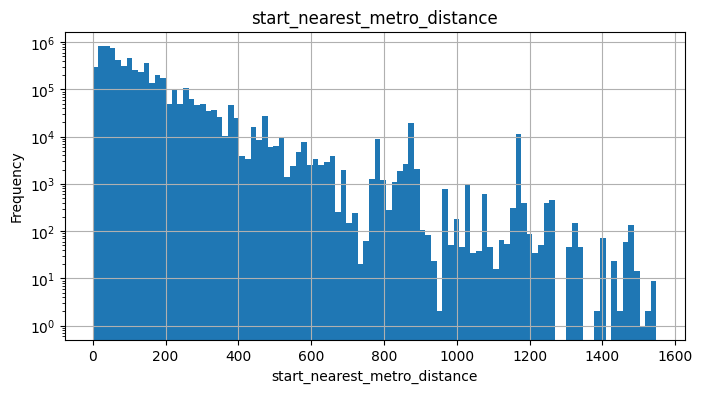

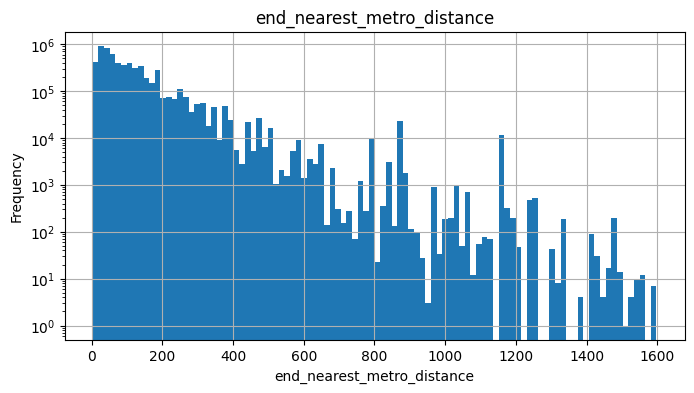

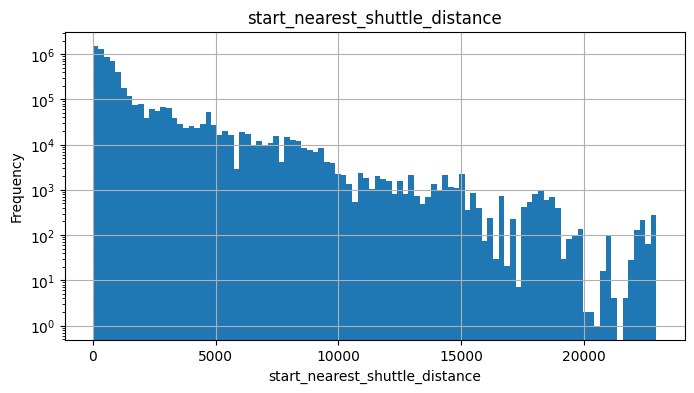

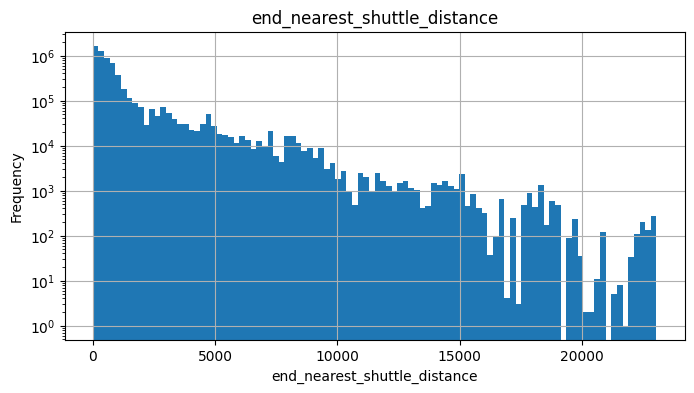

In [ ]:
import matplotlib.pyplot as plt

cols = ['start_nearest_metro_distance', 'end_nearest_metro_distance',
        'start_nearest_shuttle_distance', 'end_nearest_shuttle_distance']

for col in cols:
    trips_df[col].plot(kind='hist', bins=100, log=True, figsize=(8, 4), title=col)
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


In [ ]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6090742 entries, 0 to 6109672
Data columns (total 56 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   ride_id                         string        
 1   rideable_type                   string        
 2   started_at                      datetime64[ns]
 3   ended_at                        datetime64[ns]
 4   start_station_name              string        
 5   start_station_id                string        
 6   end_station_name                string        
 7   end_station_id                  string        
 8   start_lat                       float64       
 9   start_lng                       float64       
 10  end_lat                         float64       
 11  end_lng                         float64       
 12  member_casual                   string        
 13  start_time                      datetime64[ns]
 14  end_time                        datetime64[ns]
 15  dat

In [ ]:
max_reasonable_distance = 100000
trips_df = trips_df[
    (trips_df['start_nearest_metro_distance'] < 3600) &
    (trips_df['end_nearest_metro_distance'] < 7000) &
    (trips_df['start_nearest_shuttle_distance'] < 23000) &
    (trips_df['end_nearest_shuttle_distance'] < 50000)
]

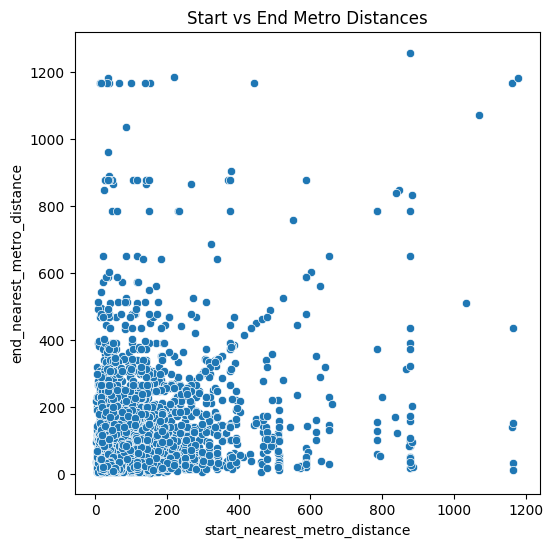

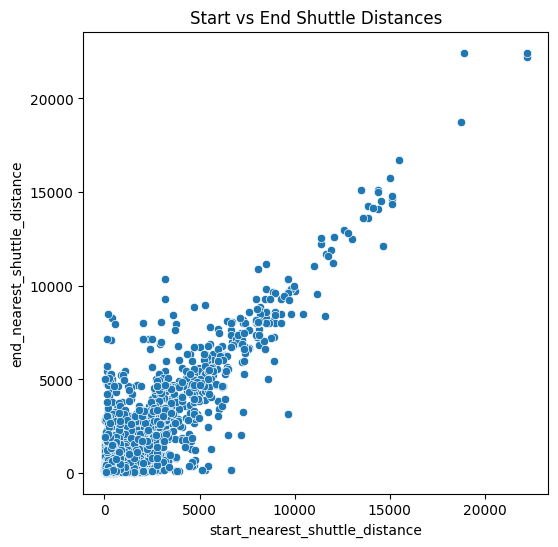

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x='start_nearest_metro_distance', y='end_nearest_metro_distance', data=trips_df.sample(5000))
plt.title('Start vs End Metro Distances')
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x='start_nearest_shuttle_distance', y='end_nearest_shuttle_distance', data=trips_df.sample(5000))
plt.title('Start vs End Shuttle Distances')
plt.show()


___

**B6**
___


In [ ]:
print(trips_df['start_point'].iloc[0], type(trips_df['start_point'].iloc[0]))
print(trips_df['end_point'].iloc[0], type(trips_df['end_point'].iloc[0]))
print(type(cbd_polygon))


POINT (-77.012365 38.908643) <class 'shapely.geometry.point.Point'>
POINT (-77.011987 38.903819) <class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.polygon.Polygon'>


In [ ]:
# # Convert Strings to shapely Points
# from shapely.wkt import loads as wkt_loads

# trips_df['start_point'] = trips_df['start_point'].apply(wkt_loads)
# trips_df['end_point'] = trips_df['end_point'].apply(wkt_loads)


In [ ]:
print(trips_df['start_point'].iloc[0], type(trips_df['start_point'].iloc[0]))
print(trips_df['end_point'].iloc[0], type(trips_df['end_point'].iloc[0]))
print(type(cbd_polygon))


POINT (-77.012365 38.908643) <class 'shapely.geometry.point.Point'>
POINT (-77.011987 38.903819) <class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.polygon.Polygon'>


In [ ]:
# import geopandas as gpd

# # Step 1: Extract the CBD polygon
# cbd_polygon = CBD.geometry.iloc[0]  # assuming there's only one polygon

# # Step 2: Check if start or end points are inside the CBD polygon
# # This works if start_point and end_point columns are shapely Points

# trips_df['start_in_cbd'] = trips_df['start_point'].apply(lambda pt: cbd_polygon.contains(pt))
# trips_df['end_in_cbd'] = trips_df['end_point'].apply(lambda pt: cbd_polygon.contains(pt))

# # Step 3: Create the binary column indicating if the trip is in CBD
# trips_df['in_cbd'] = trips_df['start_in_cbd'] | trips_df['end_in_cbd']


In [ ]:
# STEP 0: Make sure the CBD polygon is projected correctly
CBD = CBD.to_crs(epsg=6933)
cbd_polygon = CBD.geometry.iloc[0]  # assuming a single polygon
# STEP 1: Create a GeoDataFrame from the trip points (start and end)
# start_gdf = gpd.GeoDataFrame(trips_df, geometry=trips_df['start_point'], crs="EPSG:4326")
# end_gdf   = gpd.GeoDataFrame(trips_df, geometry=trips_df['end_point'], crs="EPSG:4326")

# Rebuild the point geometries from lat/lng in EPSG:4326
start_gdf = gpd.GeoDataFrame(
    trips_df,
    geometry=gpd.points_from_xy(trips_df['start_lng'], trips_df['start_lat']),
    crs="EPSG:4326"
)

end_gdf = gpd.GeoDataFrame(
    trips_df,
    geometry=gpd.points_from_xy(trips_df['end_lng'], trips_df['end_lat']),
    crs="EPSG:4326"
)


# Project everything to EPSG:6933
CBD = CBD.to_crs(epsg=6933)
start_gdf = start_gdf.to_crs(epsg=6933)
end_gdf = end_gdf.to_crs(epsg=6933)

# CBD polygon (in same projection)
cbd_polygon = CBD.geometry.unary_union
# Check containment
trips_df['start_in_cbd'] = start_gdf['geometry'].apply(lambda pt: cbd_polygon.contains(pt))
trips_df['end_in_cbd']   = end_gdf['geometry'].apply(lambda pt: cbd_polygon.contains(pt))

# Final result
trips_df['in_cbd'] = trips_df['start_in_cbd'] | trips_df['end_in_cbd']
trips_df['in_cbd'].value_counts()

<ipython-input-100-3513d04beab0>:28: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



,count
in_cbd,
False,4314363
True,1776379


___

**B7**
___


In [ ]:
# --- Step 1: Compute the CBD centroid (already in EPSG:6933)
cbd_centroid = cbd_polygon.centroid  # geometry in meters (EPSG:6933)

# --- Step 2: Recreate end point GeoDataFrame and project to EPSG:6933
end_gdf = gpd.GeoDataFrame(
    trips_df,
    geometry=gpd.points_from_xy(trips_df['end_lng'], trips_df['end_lat']),
    crs="EPSG:4326"
).to_crs(epsg=6933)

# --- Step 3: Compute Euclidean distance in meters
trips_df['distance_to_cbd_m'] = end_gdf.geometry.distance(cbd_centroid)

# --- Step 4: Set distance to None where start AND end are in the CBD
mask = trips_df['start_in_cbd'] & trips_df['end_in_cbd']
trips_df.loc[mask, 'distance_to_cbd_m'] = None

# --- Step 5: Inspect result
trips_df['distance_to_cbd_m'].describe()


,distance_to_cbd_m
count,5.718495e+06
mean,3.550079e+03
std,2.687145e+03
min,2.214205e+02
25%,1.874269e+03
50%,2.854468e+03
75%,4.329876e+03
max,2.994110e+04


# **Threasholding strategies**

elbow method

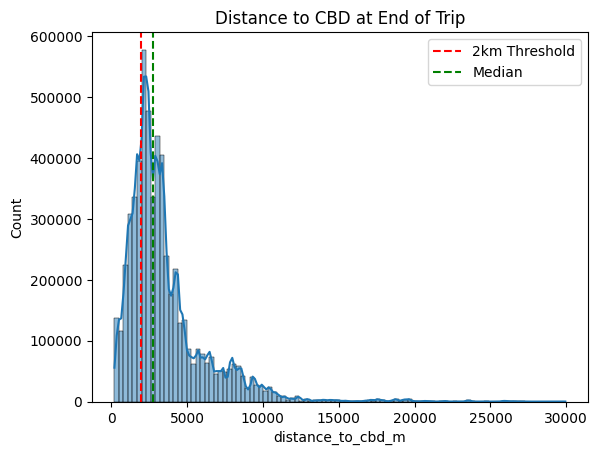

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(trips_df['distance_to_cbd_m'], bins=100, kde=True)
plt.axvline(2000, color='r', linestyle='--', label='2km Threshold')
plt.axvline(2764, color='g', linestyle='--', label='Median')
plt.legend()
plt.title("Distance to CBD at End of Trip")
plt.show()


In [ ]:
"""
i will choose this beacause looking at the histogram we can see the counts drops
"""
threshold = 2764
# Apply binary classification
trips_df['close_to_cbd'] = trips_df['distance_to_cbd_m'].apply(
    lambda d: None if pd.isna(d) else d <= threshold
)



In [ ]:
trips_df['close_to_cbd'].value_counts()

,count
close_to_cbd,
False,2967348
True,2751147


In [ ]:
print(trips_df['close_to_cbd'].isna().sum())

372247


In [ ]:
# # prompt: i want to upload this stations_df to my drive , in a folder called BikeShare

# # Save the stations_df DataFrame to a CSV file
# # Define the path in your Google Drive
# output_path = '/content/drive/My Drive/BikeShare/trips_df_epsg6933.csv'

# # Ensure the directory exists (optional, but good practice)
# import os
# output_dir = os.path.dirname(output_path)
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Save the DataFrame
# trips_df.to_csv(output_path, index=False)

# print(f"trips_df successfully saved to {output_path}")

In [ ]:

# # 1. Mount your Google Drive
# drive.mount('/content/drive')
# # This will open a new tab/window asking you to authorize Google Colab to access your Drive.
# # Follow the instructions to paste the authorization code back into the Colab cell.

# # 2. Define the path to your CSV file
# file_path = '/content/drive/My Drive/BikeShare/trips_df_epsg6933.csv'

# # 3. Read the CSV file into a pandas DataFrame
# try:
#     trips_df = pd.read_csv(file_path)
#     print("File loaded successfully!")
#     print(f"Shape of trips_df: {trips_df.shape}")
#     print("First 5 rows of trips_df:")
#     print(trips_df.head())
# except FileNotFoundError:
#     print(f"Error: The file '{file_path}' was not found. Please check the path and file name.")
# except Exception as e:
#     print(f"An error occurred while loading the file: {e}")

___

**B8**
___


In [ ]:
trips_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'date', 'name', 'datetime',
       'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'cloudcover', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'start_year',
       'start_month', 'start_day_num', 'start_day_name', 'end_year',
       'end_month', 'end_day_num', 'end_day_name', 'trip_duration_minutes',
       'trip_cost', 'start_point', 'end_point', 'start_in_cbd', 'end_in_cbd',
       'in_cbd', 'start_x', 'start_y', 'end_x', 'end_y',
       'start_nearest_metro_distance', 'end_nearest_metro_distance',
       'start_nearest_shuttle_distance', 'end_nearest_shuttle_distance',
       'distance_to_cbd_m', 'close_to_cbd'],
      dtype='object')

In [ ]:
# import geohash2
# import pandas as pd

# # Define a helper to encode coordinates
# def encode_geohash(lat, lon, precision=7):
#     return geohash2.encode(lat, lon, precision=precision)

# # Choose precision level
# # For city-level clustering, 6 or 7 is good
# # 6 → ~1.2 km × 0.6 km
# # 7 → ~153 m × 153 m
# geohash_precision = 7

# # Apply to start and end points
# tqdm.pandas(desc="Encoding start geohash")
# trips_df['start_geohash'] = trips_df.progress_apply(
#     lambda row: encode_geohash(row['start_lat'], row['start_lng'], geohash_precision),
#     axis=1
# )

# tqdm.pandas(desc="Encoding end geohash")
# trips_df['end_geohash'] = trips_df.progress_apply(
#     lambda row: encode_geohash(row['end_lat'], row['end_lng'], geohash_precision),
#     axis=1
# )

# # (Optional) Combine to make a route sector
# trips_df['trip_geohash_sector'] = trips_df['start_geohash'] + '→' + trips_df['end_geohash']


In [ ]:
"""
Washington, D.C. is roughly:

~16 km (north-south)

~13 km (east-west)

So, a geohash precision of 5–8 is appropriate.
"""
def encode_geohashes(df, lat_col, lon_col, precisions):
    for p in precisions:
        col_name = f'geohash_p{p}'
        df[col_name] = df.apply(lambda row: geohash2.encode(row[lat_col], row[lon_col], p), axis=1)
    return df

# Try precisions from 5 to 8
precisions_to_test = [5, 6, 7, 8]
trips_df = encode_geohashes(trips_df, 'start_lat', 'start_lng', precisions_to_test)


In [ ]:
for p in precisions_to_test:
    print(f"Precision {p}: {trips_df[f'geohash_p{p}'].nunique()} unique regions")
"""
If the number is too small → you're over-aggregating.

If it's too big (e.g. thousands) → too fine → hard to summarize meaningfully.
"""

Precision 5: 76 unique regions
Precision 6: 989 unique regions
Precision 7: 3595 unique regions
Precision 8: 12399 unique regions


"\nIf the number is too small → you're over-aggregating.\n\nIf it's too big (e.g. thousands) → too fine → hard to summarize meaningfully.\n"

In [ ]:
for p in precisions_to_test:
    counts = trips_df[f'geohash_p{p}'].value_counts()
    print(f"Precision {p} → median trips per geohash: {counts.median()}")
"""
This tells you how balanced the spatial bins are.

You ideally want 50–500 trips per cell.
"""

Precision 5 → median trips per geohash: 1761.0
Precision 6 → median trips per geohash: 197.0
Precision 7 → median trips per geohash: 7.0
Precision 8 → median trips per geohash: 2.0


'\nThis tells you how balanced the spatial bins are.\n\nYou ideally want 50–500 trips per cell.\n'

| Precision | Median Trips per Geohash | Interpretation                                                     |
| --------- | ------------------------ | ------------------------------------------------------------------ |
| **5**     | 1761                     | ⚠️ Too coarse — merges many neighborhoods into one.                |
| **6**     | 197                      | ✅ Good balance — each area has enough trips for reliable analysis. |
| **7**     | 7                        | ⚠️ Very fine — may be too sparse for most practical summaries.     |
| **8**     | 2                        | 🚫 Too sparse — most areas will be noise or empty.                 |


In [ ]:
# we will choose 6
trips_df['geohash_sector'] = trips_df['geohash_p6']


___

**B9**
___


In [ ]:
# Group by Sector and Date
# Assume you have a 'date' column (convert if needed)
trips_df['date'] = pd.to_datetime(trips_df['date'])

# Count trips per day per sector
daily_counts = trips_df.groupby(['geohash_p6', 'date']).size().reset_index(name='trip_count')

# Now compute average daily trips per geohash sector
avg_daily_trips = daily_counts.groupby('geohash_p6')['trip_count'].mean().reset_index()
avg_daily_trips.rename(columns={'trip_count': 'avg_daily_trips'}, inplace=True)


Choose Segmentation Method (for Red / Yellow / Gray)


| Method                         | Description                          | Pros             | Use Case             |
| ------------------------------ | ------------------------------------ | ---------------- | -------------------- |
| **Quantiles** (e.g., tertiles) | Divide into 3 equal-sized groups     | Simple, fair     | Balanced datasets    |
| **Natural Breaks (Jenks)**     | Optimize separation between clusters | Data-aware       | Uneven distributions |
| **KMeans Clustering (k=3)**    | Machine learning-based segmentation  | Optimal grouping | Large datasets       |


In [ ]:
# quantiles :
# Assign labels based on quantiles
quantiles = avg_daily_trips['avg_daily_trips'].quantile([1/3, 2/3])
low_thresh = quantiles.iloc[0]
high_thresh = quantiles.iloc[1]

def classify_volume(val):
    if val < low_thresh:
        return 'gray'   # Low volume
    elif val < high_thresh:
        return 'yellow' # Medium volume
    else:
        return 'red'    # High volume

avg_daily_trips['volume_segment'] = avg_daily_trips['avg_daily_trips'].apply(classify_volume)


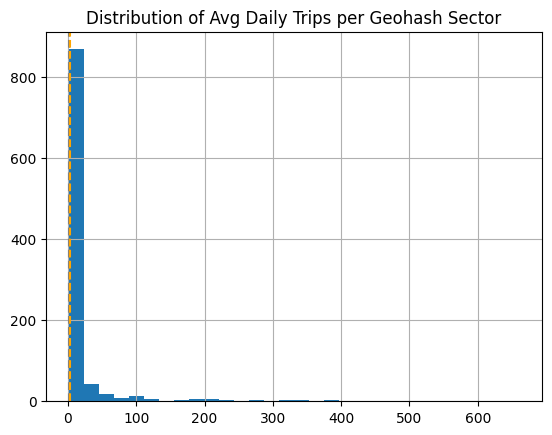

In [ ]:
import matplotlib.pyplot as plt
avg_daily_trips['avg_daily_trips'].hist(bins=30)
plt.title("Distribution of Avg Daily Trips per Geohash Sector")
plt.axvline(low_thresh, color='gray', linestyle='--')
plt.axvline(high_thresh, color='orange', linestyle='--')


In [ ]:
X = avg_daily_trips[['avg_daily_trips']].values

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
avg_daily_trips['kmeans_label'] = kmeans.labels_

# Map to red/yellow/gray using sorted cluster means
label_map = dict(zip(
    np.argsort(kmeans.cluster_centers_.flatten()),
    ['gray', 'yellow', 'red']
))
avg_daily_trips['kmeans_segment'] = avg_daily_trips['kmeans_label'].map(label_map)


In [ ]:
avg_daily_trips.head()

,geohash_p6,avg_daily_trips,volume_segment,kmeans_label,kmeans_segment
0,dqchbu,1.214286,gray,1,gray
1,dqchbz,1.641509,yellow,1,gray
2,dqchcq,1.000000,gray,1,gray
3,dqchcw,1.000000,gray,1,gray
4,dqchd7,1.000000,gray,1,gray


In [ ]:
trips_df['geohash_p6'].nunique()

989

In [ ]:
# # prompt: in trips_df i want to drop the following column :'geohash_p5',
# #        'geohash_p7', 'geohash_p8'

# trips_df = trips_df.drop(columns=['geohash_p6'])

In [ ]:
# Merge segments into trips_df
trips_df = trips_df.merge(
    avg_daily_trips[['geohash_p6','volume_segment','kmeans_segment']],
    on='geohash_p6',
    how='left'
)


In [ ]:
trips_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'date', 'name', 'datetime',
       'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'cloudcover', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'start_year',
       'start_month', 'start_day_num', 'start_day_name', 'end_year',
       'end_month', 'end_day_num', 'end_day_name', 'trip_duration_minutes',
       'trip_cost', 'start_point', 'end_point', 'start_in_cbd', 'end_in_cbd',
       'in_cbd', 'start_x', 'start_y', 'end_x', 'end_y',
       'start_nearest_metro_distance', 'end_nearest_metro_distance',
       'start_nearest_shuttle_distance', 'end_nearest_shuttle_distance',
       'distance_to_cbd_m', 'close_to_cbd', 'geohash_p5', 'geohash_p6',
 

In [ ]:
# # try2
# # Volume-based quantiles
# avg_daily_trips['volume_segment2'] = pd.qcut(
#     avg_daily_trips['avg_daily_trips'],
#     q=3,
#     labels=['gray', 'yellow', 'red']
# )

# # KMeans
# kmeans = KMeans(n_clusters=3, random_state=42)
# avg_daily_trips['kmeans_cluster'] = kmeans.fit_predict(avg_daily_trips[['avg_daily_trips']])

# # Map cluster index to consistent labels
# # (you may need to sort centroids to label them meaningfully)
# centroids = kmeans.cluster_centers_.flatten()
# cluster_labels = ['gray', 'yellow', 'red']
# cluster_order = np.argsort(centroids)
# label_map = {cluster_order[i]: cluster_labels[i] for i in range(3)}

# avg_daily_trips['kmeans_segment2'] = avg_daily_trips['kmeans_cluster'].map(label_map)


In [ ]:
comparison = pd.crosstab(avg_daily_trips['volume_segment'], avg_daily_trips['kmeans_segment'])
comparison


kmeans_segment,gray,red,yellow
volume_segment,,,
gray,323,0,0
red,274,13,43
yellow,336,0,0


In [ ]:
trips_df['kmeans_segment'].value_counts()


,count
kmeans_segment,
yellow,2472940
red,1896496
gray,1721306


In [ ]:
trips_df['volume_segment'].value_counts()

,count
volume_segment,
red,5992142
yellow,92998
gray,5602


In [ ]:
# # prompt: i want to upload this stations_df to my drive , in a folder called BikeShare

# # Save the stations_df DataFrame to a CSV file
# # Define the path in your Google Drive
# output_path = '/content/drive/My Drive/BikeShare/trips_df_b9.csv'

# # Ensure the directory exists (optional, but good practice)
# import os
# output_dir = os.path.dirname(output_path)
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Save the DataFrame
# trips_df.to_csv(output_path, index=False)

# print(f"trips_df successfully saved to {output_path}")

trips_df successfully saved to /content/drive/My Drive/BikeShare/trips_df_b9.csv


___
**B10**
___

In [9]:
trips_df['conditions'].value_counts()

,count
conditions,
Partially cloudy,3566957
"Rain, Partially cloudy",1246476
"Rain, Overcast",775624
Clear,424601
Overcast,51262
"Snow, Rain, Overcast",11540
"Snow, Rain, Partially cloudy",10492
"Snow, Partially cloudy",3790


In [10]:
def classify_weather(condition):
    condition = condition.lower()  # lowercase for safety
    if 'rain' in condition or 'snow' in condition:
        return 'rainy'
    elif 'overcast' in condition or 'cloudy' in condition:
        return 'cloudy'
    elif 'clear' in condition:
        return 'sunny'
    else:
        return 'unknown'

# Apply binning
trips_df['weather_segment'] = trips_df['conditions'].apply(classify_weather)


In [11]:
trips_df['weather_segment'].value_counts()

,count
weather_segment,
cloudy,3618219
rainy,2047922
sunny,424601


___
**B11**
___

In [35]:
trips_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'date', 'name', 'datetime',
       'tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'windspeedmax',
       'windspeedmean', 'windspeedmin', 'cloudcover', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'start_year',
       'start_month', 'start_day_num', 'start_day_name', 'end_year',
       'end_month', 'end_day_num', 'end_day_name', 'trip_duration_minutes',
       'trip_cost', 'start_point', 'end_point', 'start_in_cbd', 'end_in_cbd',
       'in_cbd', 'start_x', 'start_y', 'end_x', 'end_y',
       'start_nearest_metro_distance', 'end_nearest_metro_distance',
       'start_nearest_shuttle_distance', 'end_nearest_shuttle_distance',
       'distance_to_cbd_m', 'close_to_cbd', 'geohash_p6', 'volume_segment

In [32]:
sorted_ended_at_df = trips_df[['ended_at']].sort_values(by='ended_at')
print("--- Sorted 'ended_at' DataFrame (first 5 rows) ---")
print(sorted_ended_at_df.head())
print("\n")

# --- Step 3: Find the earliest and latest dates ---
earliest_date = sorted_ended_at_df['ended_at'].min()
latest_date = sorted_ended_at_df['ended_at'].max()

print(f"The earliest date in 'ended_at' is: {earliest_date}")
print(f"The latest date in 'ended_at' is: {latest_date}")


--- Sorted 'ended_at' DataFrame (first 5 rows) ---
                  ended_at
270000 2000-01-01 15:55:56
508931 2000-01-02 14:36:37
321740 2000-01-02 14:40:08
321739 2000-01-02 14:59:43
53818  2024-01-01 00:04:53


The earliest date in 'ended_at' is: 2000-01-01 15:55:56
The latest date in 'ended_at' is: 2024-12-31 23:59:43.038000


In [27]:
# Make sure 'ended_at' is datetime
# trips_df['ended_at'] = pd.to_datetime(trips_df['ended_at'])
trips_df['ended_at'] = pd.to_datetime(trips_df['ended_at'], format='mixed', errors='coerce')


# Extract just the date (without time)
trips_df['end_date'] = trips_df['ended_at'].dt.date
daily_income_weather = trips_df.groupby(['end_date', 'weather_segment'])['trip_cost'].sum().reset_index()



In [31]:
import plotly.express as px
import plotly.graph_objects as go
# Make sure end_date is datetime
daily_income_weather['end_date'] = pd.to_datetime(daily_income_weather['end_date'])

fig_long = px.line(
    daily_income_weather,
    x='end_date',
    y='trip_cost',
    color='weather_segment',
    title='Daily Total Trip Cost by Weather Condition (Long Format)',
    labels={'end_date': 'Date', 'trip_cost': 'Total Income', 'weather_segment': 'Weather'}
)

fig_long.update_layout(xaxis_title='Date', yaxis_title='Trip Cost', hovermode='x unified')
fig_long.show()


In [34]:
# Pivot to wide format
wide_df = daily_income_weather.pivot(index='end_date', columns='weather_segment', values='trip_cost').fillna(0)
wide_df = wide_df.sort_index()

# Build traces
fig_wide = go.Figure()

for condition in wide_df.columns:
    fig_wide.add_trace(go.Scatter(
        x=wide_df.index,
        y=wide_df[condition],
        mode='lines',
        name=condition
    ))

fig_wide.update_layout(
    title='Daily Total Trip Cost by Weather Condition (Wide Format)',
    xaxis_title='Date',
    yaxis_title='Trip Cost',
    hovermode='x unified',
    template='plotly_white',
    legend_title='Weather'
)

fig_wide.show()


Which one is better for our problem  ?
answer here :

___
B12
___

In [37]:
# feature 1 : rush_hour
# Indicates if the ride occurred during typical commuting hours (7–10 AM or 4–7 PM).
trips_df['start_time'] = pd.to_datetime(trips_df['start_time'], errors='coerce')

trips_df['rush_hour'] = (
    trips_df['start_time'].dt.hour.between(7, 10) |
    trips_df['start_time'].dt.hour.between(16, 19)
).astype(int)


In [42]:
trips_df['rush_hour'].value_counts()

,count
rush_hour,
0,5025878
1,1064864


In [43]:
# feature 2 : hour_segment
# Categorize ride start times into broader buckets.
def get_hour_segment(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Midday'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

trips_df['hour_segment'] = trips_df['start_time'].dt.hour.apply(get_hour_segment)



In [45]:
trips_df['hour_segment'].value_counts()

,count
hour_segment,
Night,4310448
Midday,644638
Evening,604391
Morning,531265


In [46]:
# feature 3 : is_weekend
# Helps spot usage patterns on weekends vs weekdays.
trips_df['is_weekend'] = trips_df['start_time'].dt.dayofweek >= 5
trips_df['is_weekend'] = trips_df['is_weekend'].astype(int)


In [47]:
trips_df['is_weekend'].value_counts()

,count
is_weekend,
0,5565033
1,525709


In [48]:
# feature 4 : ride_density_zone
# Based on start location’s proximity to popular stations (e.g., CBD or metro/shuttle stations).
trips_df['ride_density_zone'] = np.where(
    trips_df['start_nearest_metro_distance'] < 0.5, 'High Density', 'Low Density'
)


In [49]:
trips_df['ride_density_zone'].value_counts()

,count
ride_density_zone,
Low Density,6090678
High Density,64


In [50]:
# prompt: i want to upload this stations_df to my drive , in a folder called BikeShare

# Save the stations_df DataFrame to a CSV file
# Define the path in your Google Drive
output_path = '/content/drive/My Drive/BikeShare/trips_df_b12.csv'

# Ensure the directory exists (optional, but good practice)
import os
output_dir = os.path.dirname(output_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame
trips_df.to_csv(output_path, index=False)

print(f"trips_df successfully saved to {output_path}")

trips_df successfully saved to /content/drive/My Drive/BikeShare/trips_df_b12.csv


In [54]:
trips_df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,volume_segment,kmeans_segment,weather_segment,end_date,month_num,month_name,rush_hour,hour_segment,is_weekend,ride_density_zone
0,748A93D7DE8A41CD,classic_bike,2024-01-25 15:49:59,2024-01-25 15:52:35,1st & O St NW,31519,1st & L St NW,31677,38.908643,-77.012365,...,red,yellow,rainy,2024-01-25,1,January,0,Midday,0,Low Density
1,75CBFD136F06305B,classic_bike,2024-01-02 16:44:58,2024-01-02 16:53:25,1st & O St NW,31519,4th & College St NW,31138,38.908643,-77.012365,...,red,yellow,cloudy,2024-01-02,1,January,1,Midday,0,Low Density
